In [14]:
%run functions.ipynb

In [15]:
with open('first_database.pkl', 'rb') as f:
    x,y = pickle.load(f)

In [16]:
sigma = 0.5  # Example value
sigma_squared = 0.25
nu = 1.0  # Regularization parameter
num_iterations = 20000
step_size = 0.002
beta = 0.1
beta2 = 1
beta3 = 10
a=5 #number of agents

In [17]:
fully_connected_graph = generate_fully_connected_graph(a)
fc_graph = renormalize_graph(fully_connected_graph)

In [18]:
l = [k*100 for k in range(3, 11)]

for n in l:
    m = int(np.sqrt(n)) # approximation with m=sqrt(n)
    x_=x[:n] #select n first points of dataset
    y_=y[:n]
    sel = [i for i in range(n)]
    ind = np.random.choice(sel, m, replace=False)
    x_selected = np.array([x_[i] for i in ind])
    K_mm = compute_kernel_matrix(x_selected, x_selected)
    Knm = compute_kernel_matrix(x_, x_selected)
    alpha_star = compute_alpha_star(K_mm, Knm, y_, sigma_squared, nu)
    optimality_gap_fc,alpha_fc = ADMM(x_, x_selected, y_, sigma_squared, nu, a, num_iterations, beta, alpha_star, fc_graph)
    for agent_idx, optimality_gaps in enumerate(optimality_gap_fc):
        plt.plot(range(num_iterations), optimality_gaps, label=f"Agent {agent_idx + 1}")
    plt.xlabel('Iteration')
    plt.ylabel('Optimality Gap')
    plt.title(f'ADMM - Optimality Gap for Each Agent fully connected graph - beta = {beta} - n = {n}')
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(True)
    plt.show()

  1%|          | 125/20000 [00:02<07:46, 42.61it/s]


KeyboardInterrupt: 

100%|██████████| 20000/20000 [08:18<00:00, 40.10it/s]


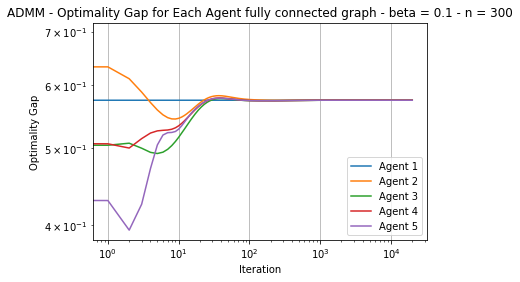

  2%|▏         | 433/20000 [00:17<13:30, 24.14it/s]


KeyboardInterrupt: 

In [ ]:
l = [k*100 for k in range(10, 20)]

for n in l:
    m = int(np.sqrt(n)) # approximation with m=sqrt(n)
    x_=x[:n] #select n first points of dataset
    y_=y[:n]
    sel = [i for i in range(n)]
    ind = np.random.choice(sel, m, replace=False)
    x_selected = np.array([x_[i] for i in ind])
    K_mm = compute_kernel_matrix(x_selected, x_selected)
    Knm = compute_kernel_matrix(x_, x_selected)
    alpha_star = compute_alpha_star(K_mm, Knm, y_, sigma_squared, nu)
    optimality_gap_fc,alpha_fc = ADMM(x_, x_selected, y_, sigma_squared, nu, a, num_iterations, beta2, alpha_star, fc_graph)
    for agent_idx, optimality_gaps in enumerate(optimality_gap_fc):
        plt.plot(range(num_iterations), optimality_gaps, label=f"Agent {agent_idx + 1}")
    plt.xlabel('Iteration')
    plt.ylabel('Optimality Gap')
    plt.title(f'ADMM - Optimality Gap for Each Agent fully connected graph - beta = {beta} - n = {n}')
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(True)
    plt.show()

100%|██████████| 10000/10000 [11:47<00:00, 14.13it/s]


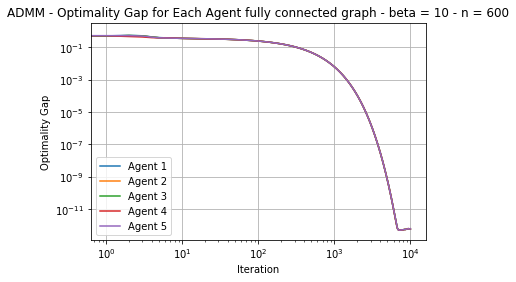

100%|██████████| 10000/10000 [15:02<00:00, 11.08it/s]


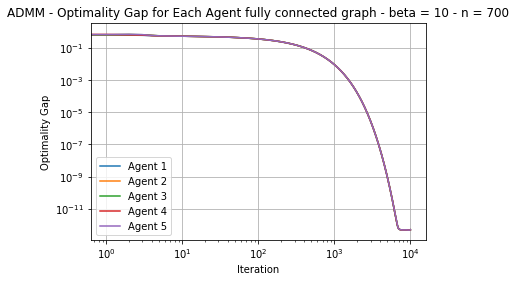

100%|██████████| 10000/10000 [18:57<00:00,  8.79it/s]


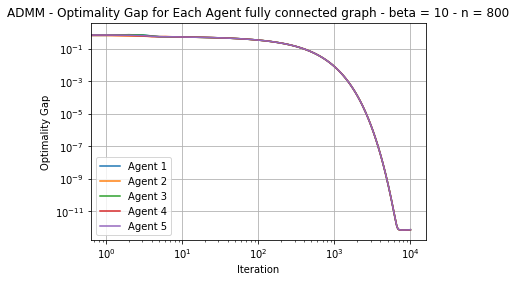

100%|██████████| 10000/10000 [21:14<00:00,  7.84it/s]


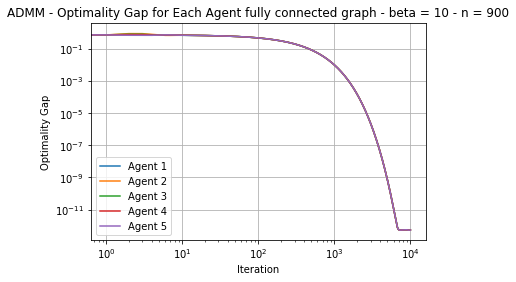

100%|██████████| 10000/10000 [24:04<00:00,  6.92it/s]


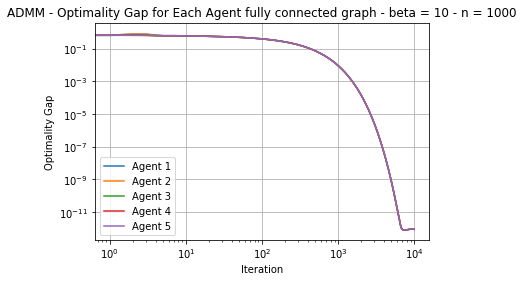

 13%|█▎        | 1252/10000 [03:21<23:57,  6.08it/s]

In [20]:
l = [k*100 for k in range(6, 20)]

for n in l:
    m = int(np.sqrt(n)) # approximation with m=sqrt(n)
    x_=x[:n] #select n first points of dataset
    y_=y[:n]
    sel = [i for i in range(n)]
    ind = np.random.choice(sel, m, replace=False)
    x_selected = np.array([x_[i] for i in ind])
    K_mm = compute_kernel_matrix(x_selected, x_selected)
    Knm = compute_kernel_matrix(x_, x_selected)
    alpha_star = compute_alpha_star(K_mm, Knm, y_, sigma_squared, nu)
    optimality_gap_fc,alpha_fc = ADMM(x_, x_selected, y_, sigma_squared, nu, a, 10000, beta3, alpha_star, fc_graph)
    for agent_idx, optimality_gaps in enumerate(optimality_gap_fc):
        plt.plot(range(10000), optimality_gaps, label=f"Agent {agent_idx + 1}")
    plt.xlabel('Iteration')
    plt.ylabel('Optimality Gap')
    plt.title(f'ADMM - Optimality Gap for Each Agent fully connected graph - beta = {beta3} - n = {n}')
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(True)
    plt.show()

100%|██████████| 20000/20000 [24:33<00:00, 13.58it/s]   


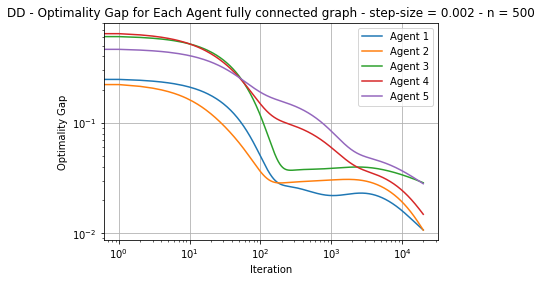

 32%|███▏      | 6371/20000 [07:23<15:47, 14.38it/s]


KeyboardInterrupt: 

In [ ]:
l = [k*100 for k in range(5, 20)]
s = [0.002 for _ in range(20000)]

for n in l:
    m = int(np.sqrt(n)) # approximation with m=sqrt(n)
    x_=x[:n] #select n first points of dataset
    y_=y[:n]
    sel = [i for i in range(n)]
    ind = np.random.choice(sel, m, replace=False)
    x_selected = np.array([x_[i] for i in ind])
    K_mm = compute_kernel_matrix(x_selected, x_selected)
    Knm = compute_kernel_matrix(x_, x_selected)
    alpha_star = compute_alpha_star(K_mm, Knm, y_, sigma_squared, nu)
    optimality_gap_fc,alpha_fc = dual_decomposition(x_, x_selected, y_, sigma_squared, nu, a, num_iterations, s, alpha_star, fc_graph)
    for agent_idx, optimality_gaps in enumerate(optimality_gap_fc):
        plt.plot(range(num_iterations), optimality_gaps, label=f"Agent {agent_idx + 1}")
    plt.xlabel('Iteration')
    plt.ylabel('Optimality Gap')
    plt.title(f'DD - Optimality Gap for Each Agent fully connected graph - step-size = {step_size} - n = {n}')
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(True)
    plt.show()

In [ ]:
# Generate communication graphs
fully_connected_graph = generate_fully_connected_graph(a)
fc_graph = renormalize_graph(fully_connected_graph)

line_graph = generate_line_graph(a)

line_graph=renormalize_graph(line_graph)

small_world_graph = generate_small_world_graph(a, p=0.1)

small_world_graph=renormalize_graph(small_world_graph)

cycle_graph = generate_cycle_graph(a)
cycle_graph = renormalize_graph(cycle_graph)

In [ ]:
optimality_gap_fc,alpha_fc = ADMM(x, x_selected, y, sigma_squared, nu, a, num_iterations, beta, alpha_star, fc_graph)
for agent_idx, optimality_gaps in enumerate(optimality_gap_fc):
    plt.plot(range(num_iterations), optimality_gaps, label=f"Agent {agent_idx + 1}")
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')
plt.title(f'ADMM - Optimality Gap for Each Agent fully connected graph - beta {beta}')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()


In [ ]:

optimality_gap_fc,alpha_fc = ADMM(x, x_selected, y, sigma_squared, nu, a, num_iterations, beta, alpha_star, fc_graph)
#print("fully connected graph done")
optimality_gap_line,alpha_line = ADMM(x, x_selected, y, sigma_squared, nu, a, num_iterations, beta, alpha_star,line_graph)
#print("line graph done")
optimality_gap_small_world,alpha_small_world = ADMM(x, x_selected, y, sigma_squared, nu, a, num_iterations, beta, alpha_star, small_world_graph)
#print("small world graph done")
optimality_gap_cycle,alpha_cycle = ADMM(x, x_selected, y, sigma_squared, nu, a, num_iterations, beta, alpha_star, cycle_graph)
#print("cycle graph done")
print("all graphs done")
for agent_idx, optimality_gaps in enumerate(optimality_gap_fc):
    plt.plot(range(num_iterations), optimality_gaps, label=f"Agent {agent_idx + 1}")
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')
plt.title(f'ADMM - Optimality Gap for Each Agent fully connected graph - beta {beta}')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

for agent_idx, optimality_gaps in enumerate(optimality_gap_line):
    plt.plot(range(num_iterations), optimality_gaps, label=f"Agent {agent_idx + 1}")

plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')
plt.title(f'ADMM - Optimality Gap for Each Agent line graph - beta {beta}')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

for agent_idx, optimality_gaps in enumerate(optimality_gap_small_world):
    plt.plot(range(num_iterations), optimality_gaps, label=f"Agent {agent_idx + 1}")

plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')
plt.title(f'ADMM - Optimality Gap for Each Agent small world graph - beta {beta}')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

for agent_idx, optimality_gaps in enumerate(optimality_gap_cycle):
    plt.plot(range(num_iterations), optimality_gaps, label=f"Agent {agent_idx + 1}")

plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')
plt.title(f'ADMM - Optimality Gap for Each Agent cycle graph - beta {beta}')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

  6%|▌         | 1138/20000 [00:05<01:38, 190.53it/s]


KeyboardInterrupt: 